### 1. Загрузка даннах

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')


In [2]:
df = pd.read_csv('../data/heart_attack_prediction_dataset.csv')

### 2. Первичное исследование: аномалии, пропуски, корректность заполнения

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
df.shape

(8763, 26)

In [5]:
df.drop_duplicates(inplace=True)
df.dropna()
df.shape

(8763, 26)

In [6]:
df.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [7]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


Базовые характеристики числовых классов нормальные

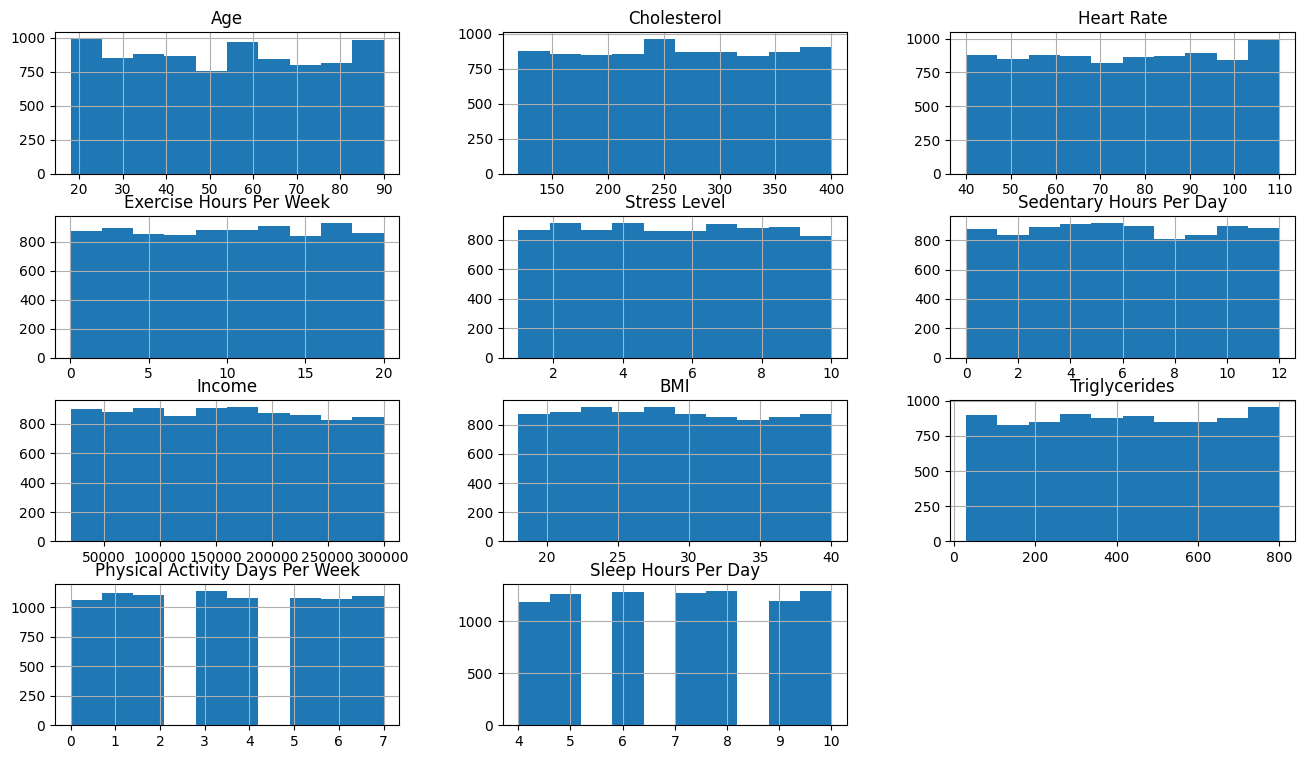

In [8]:
# Выберу числовые не бинарные данные для визуализации распределений
df_for_visualization=df[[column for column in df.select_dtypes(include='number') if df[column].nunique()>2]]

df_for_visualization.hist(figsize=(16,9))
plt.show()

Видим что данные очень выровненные, похожие на равномерное распределение

### 3. Основное исследование данных

#### Баланс классов

In [9]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

Распределение целевого значения нормальное

Посмотрим на все столбцы с типом object и их отношение с целевой меткой

In [10]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'Колонка {column}')
        print(f'{df[column].nunique()} количество уникальных из {df[column].shape[0]}')
        print(df.groupby(['Heart Attack Risk'])[column].value_counts(), '\n')

Колонка Patient ID
8763 количество уникальных из 8763
Heart Attack Risk  Patient ID
0                  AAA9246       1
                   AAC3641       1
                   AAD0466       1
                   AAE4089       1
                   AAF0810       1
                                ..
1                  ZYS3387       1
                   ZZE5646       1
                   ZZF6668       1
                   ZZI1694       1
                   ZZU2948       1
Name: count, Length: 8763, dtype: int64 

Колонка Sex
2 количество уникальных из 8763
Heart Attack Risk  Sex   
0                  Male      3916
                   Female    1708
1                  Male      2195
                   Female     944
Name: count, dtype: int64 

Колонка Blood Pressure
3915 количество уникальных из 8763
Heart Attack Risk  Blood Pressure
0                  146/94            7
                   94/109            7
                   115/100           6
                   139/106           6
       

Нет сильно выбивающихся значений

Сделаем бинарный признак для пола и разделим значение давление в два признака на нижнее - DIA, верхнее - SYS

In [11]:
df_mod = df.copy()

In [12]:
sex_enc = {'Male' : 0, 'Female' : 1}
df_mod['Sex'] = df['Sex'].map(sex_enc)
print(df_mod['Sex'].head(3))

0    0
1    0
2    1
Name: Sex, dtype: int64


In [13]:
df_pressure = df['Blood Pressure'].str.split(pat='/', expand = True)
df_pressure.rename(columns = {0: 'Sys', 1: 'Dia'}, inplace=True)

In [14]:
df_mod.drop(['Patient ID', 'Blood Pressure'], axis=1, inplace=True)
df_mod = pd.concat([df_mod, df_pressure], axis=1)
df_mod['Sys'] = df_mod['Sys'].astype(np.int64)
df_mod['Dia'] = df_mod['Dia'].astype(np.int64)
df_mod[['Dia', 'Sys']].head(3)

,Dia,Sys
0,88,158
1,93,165
2,99,174


In [15]:
def identify_categorical_features(df, unique_threshold=30, unique_ratio=0.1):

    numerical=[]
    categorical=[]
    binary = []

    ntypes = ['int64', 'float64']
    ctypes = ['object','bool']

    df_nunique = df.nunique()

    for col in df.columns:
         if (df_nunique[col] <= unique_threshold
             and df_nunique[col]/df.shape[0] <= unique_ratio):
             if df[col].dtypes in ntypes:
                 if df_nunique[col] == 2:
                     binary += [col]
                 else:
                     numerical += [col]
             elif df[col].dtypes in ctypes:
                 categorical += [col]

             elif df[col].dtypes not in category_types:
                print(f'Другой тип {col} - {df[col].dtypes}')
    return binary, numerical, categorical

In [16]:
binary_columns, num_categorical_columns, categorical_columns = identify_categorical_features(df_mod)
num_columns = [x for x in df_mod.columns if x not in [*binary_columns, *num_categorical_columns, *categorical_columns]]

In [17]:
print(f'Бинарные признаки{binary_columns}\nЧисловые категориальные признаки {num_categorical_columns} \nКатегорильные признаки {categorical_columns}\nЧисловые признаки {num_columns}')

Бинарные признаки['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']
Числовые категориальные признаки ['Stress Level', 'Physical Activity Days Per Week', 'Sleep Hours Per Day'] 
Категорильные признаки ['Diet', 'Country', 'Continent', 'Hemisphere']
Числовые признаки ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Sys', 'Dia']


Категориальных данных не так много, посмотрим на каждый из них

In [18]:
# Diet
df_mod['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [19]:
#Всего 3 типа которые имеют логику
#можно попробовать закодировать для дальнейшего исследования Label encoder по ухудшению типа диеты
diet_map = {'Healthy':0, 'Average':1, 'Unhealthy':2}
df_mod['Diet'] = df_mod['Diet'].map(diet_map)
num_categorical_columns += ['Diet']
categorical_columns.remove('Diet')

In [20]:
df_mod['Diet'].head(5)

0    1
1    2
2    0
3    1
4    2
Name: Diet, dtype: int64

In [21]:
# Категориальные географические данные 'Country', 'Continent', 'Hemisphere'
df_mod.groupby(categorical_columns,sort=True)['Heart Attack Risk'].value_counts()

Country         Continent      Hemisphere           Heart Attack Risk
Argentina       South America  Southern Hemisphere  0                    297
                                                    1                    174
Australia       Australia      Southern Hemisphere  0                    281
                                                    1                    168
Brazil          South America  Southern Hemisphere  0                    299
                                                    1                    163
Canada          North America  Northern Hemisphere  0                    282
                                                    1                    158
China           Asia           Northern Hemisphere  0                    281
                                                    1                    155
Colombia        South America  Northern Hemisphere  0                    267
                                                    1                    162
France

По отношению к целевой метке дисбаланса нет

#### Кореляции

Переведу label encoder географические данные, что бы посмотреть на их корреляции с остальными метками

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=int)
enc.fit(df_mod[categorical_columns])
df_mod[categorical_columns] = enc.transform(df_mod[categorical_columns])

num_categorical_columns += categorical_columns

In [23]:
df_mod.info() #убедимся что все данные числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

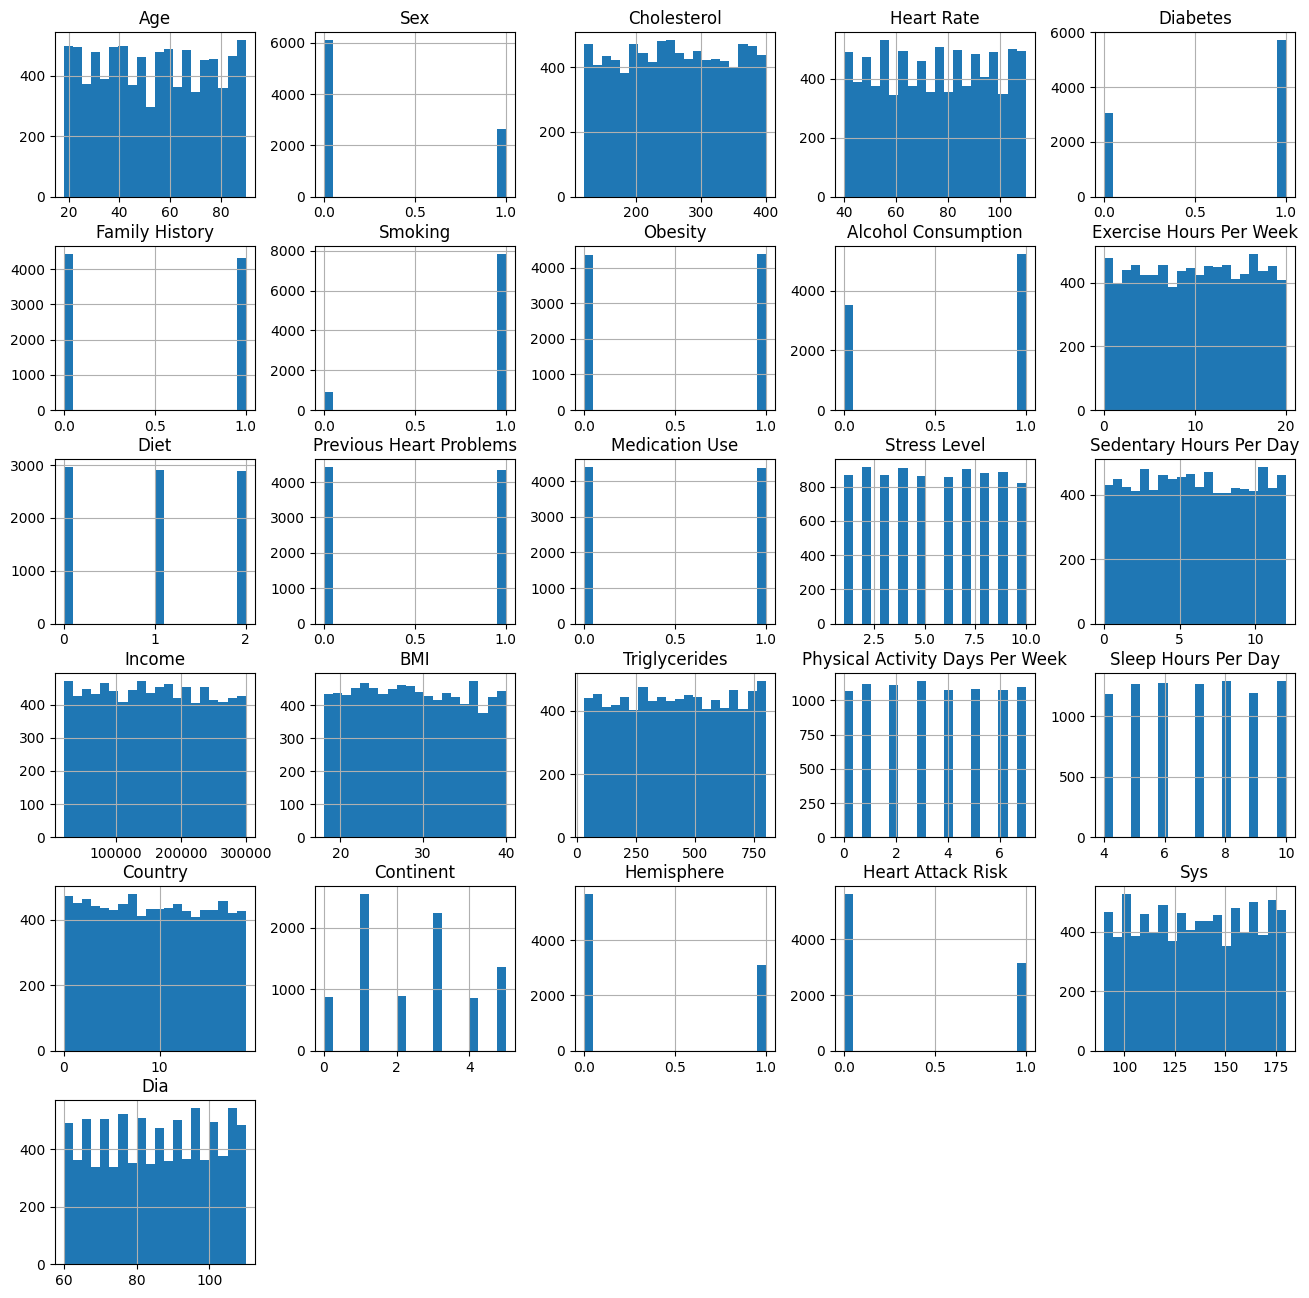

In [24]:
df_mod.hist(figsize=(16, 16), bins=20)
plt.show()

Видно неравномерное распределение классов у признака Smoking, посмотрим на соотношение с возрастом

In [25]:
df_mod.groupby(['Smoking'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Smoking,,,,,,,,
0,904.0,28.96792,6.604478,18.0,23.0,29.0,35.0,40.0
1,7859.0,56.55376,20.492976,18.0,41.0,58.0,74.0,90.0


<Axes: xlabel='Smoking', ylabel='Age'>

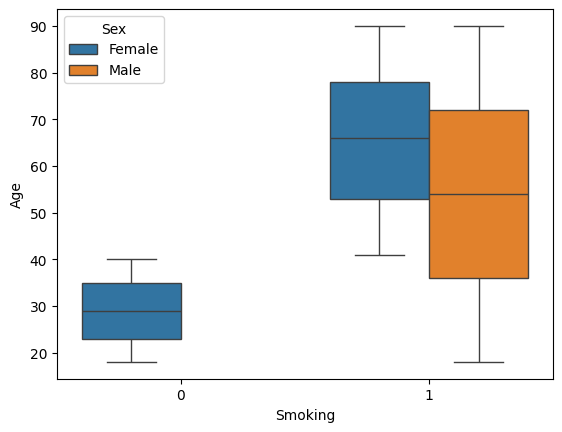

In [26]:
sns.boxplot(data=df, x='Smoking', y='Age', hue='Sex')

In [27]:
mask_male_and_smoking = (df_mod["Sex"]==0) & (df_mod["Smoking"]==1)
mask_male = (df_mod["Sex"]==0)
df_mod[mask_male_and_smoking].shape == df_mod[mask_male].shape

True

In [28]:
df_mod[(df_mod['Age'] > 40) & (df_mod['Smoking'] == 0)].shape

(0, 26)

Расределение курящих явно имеет ошибки: нет не курящих мужчин, у женщин строгое разбиение по возрасту: не курят до 40 и естьте которые курят после 40

Построим все попарные графики

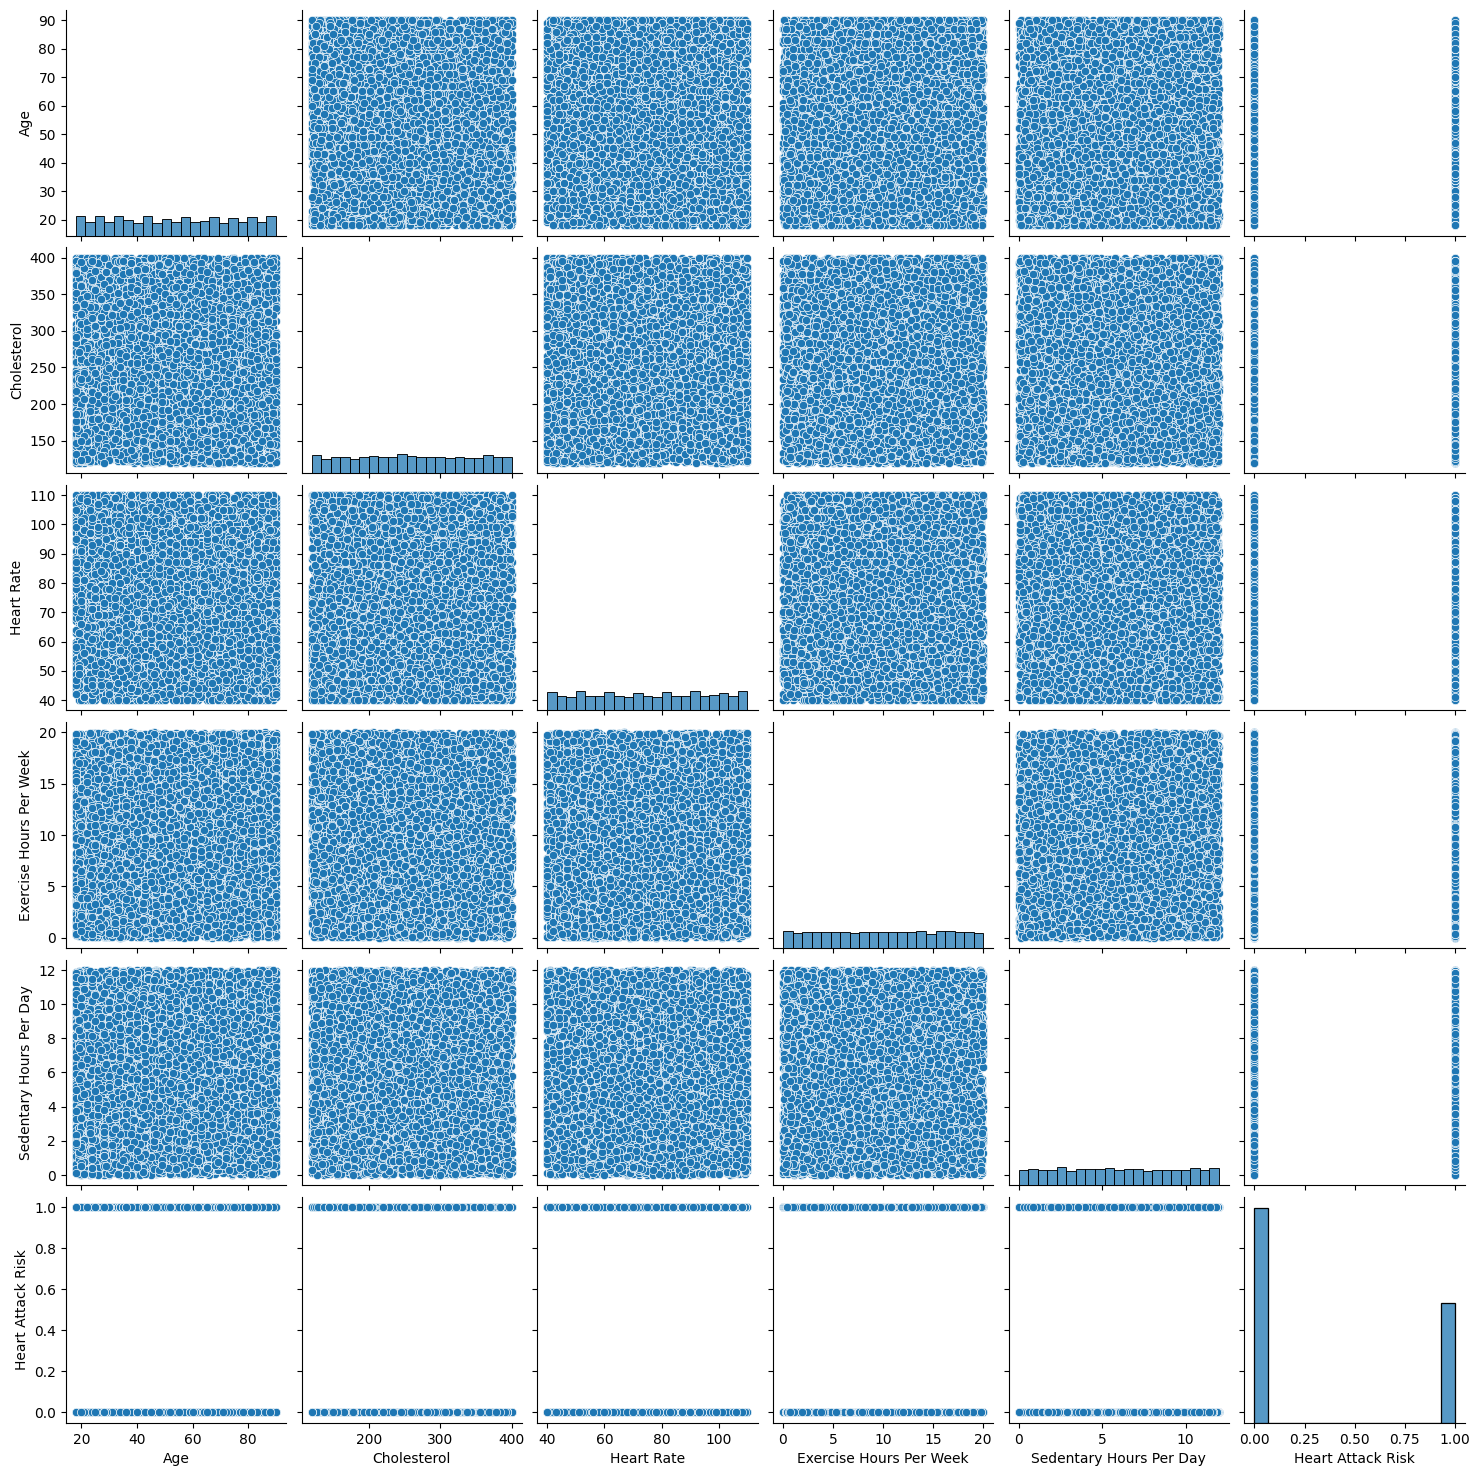

In [29]:
sns.pairplot(df_mod[num_columns[:len(num_columns)//2:] + ['Heart Attack Risk']])

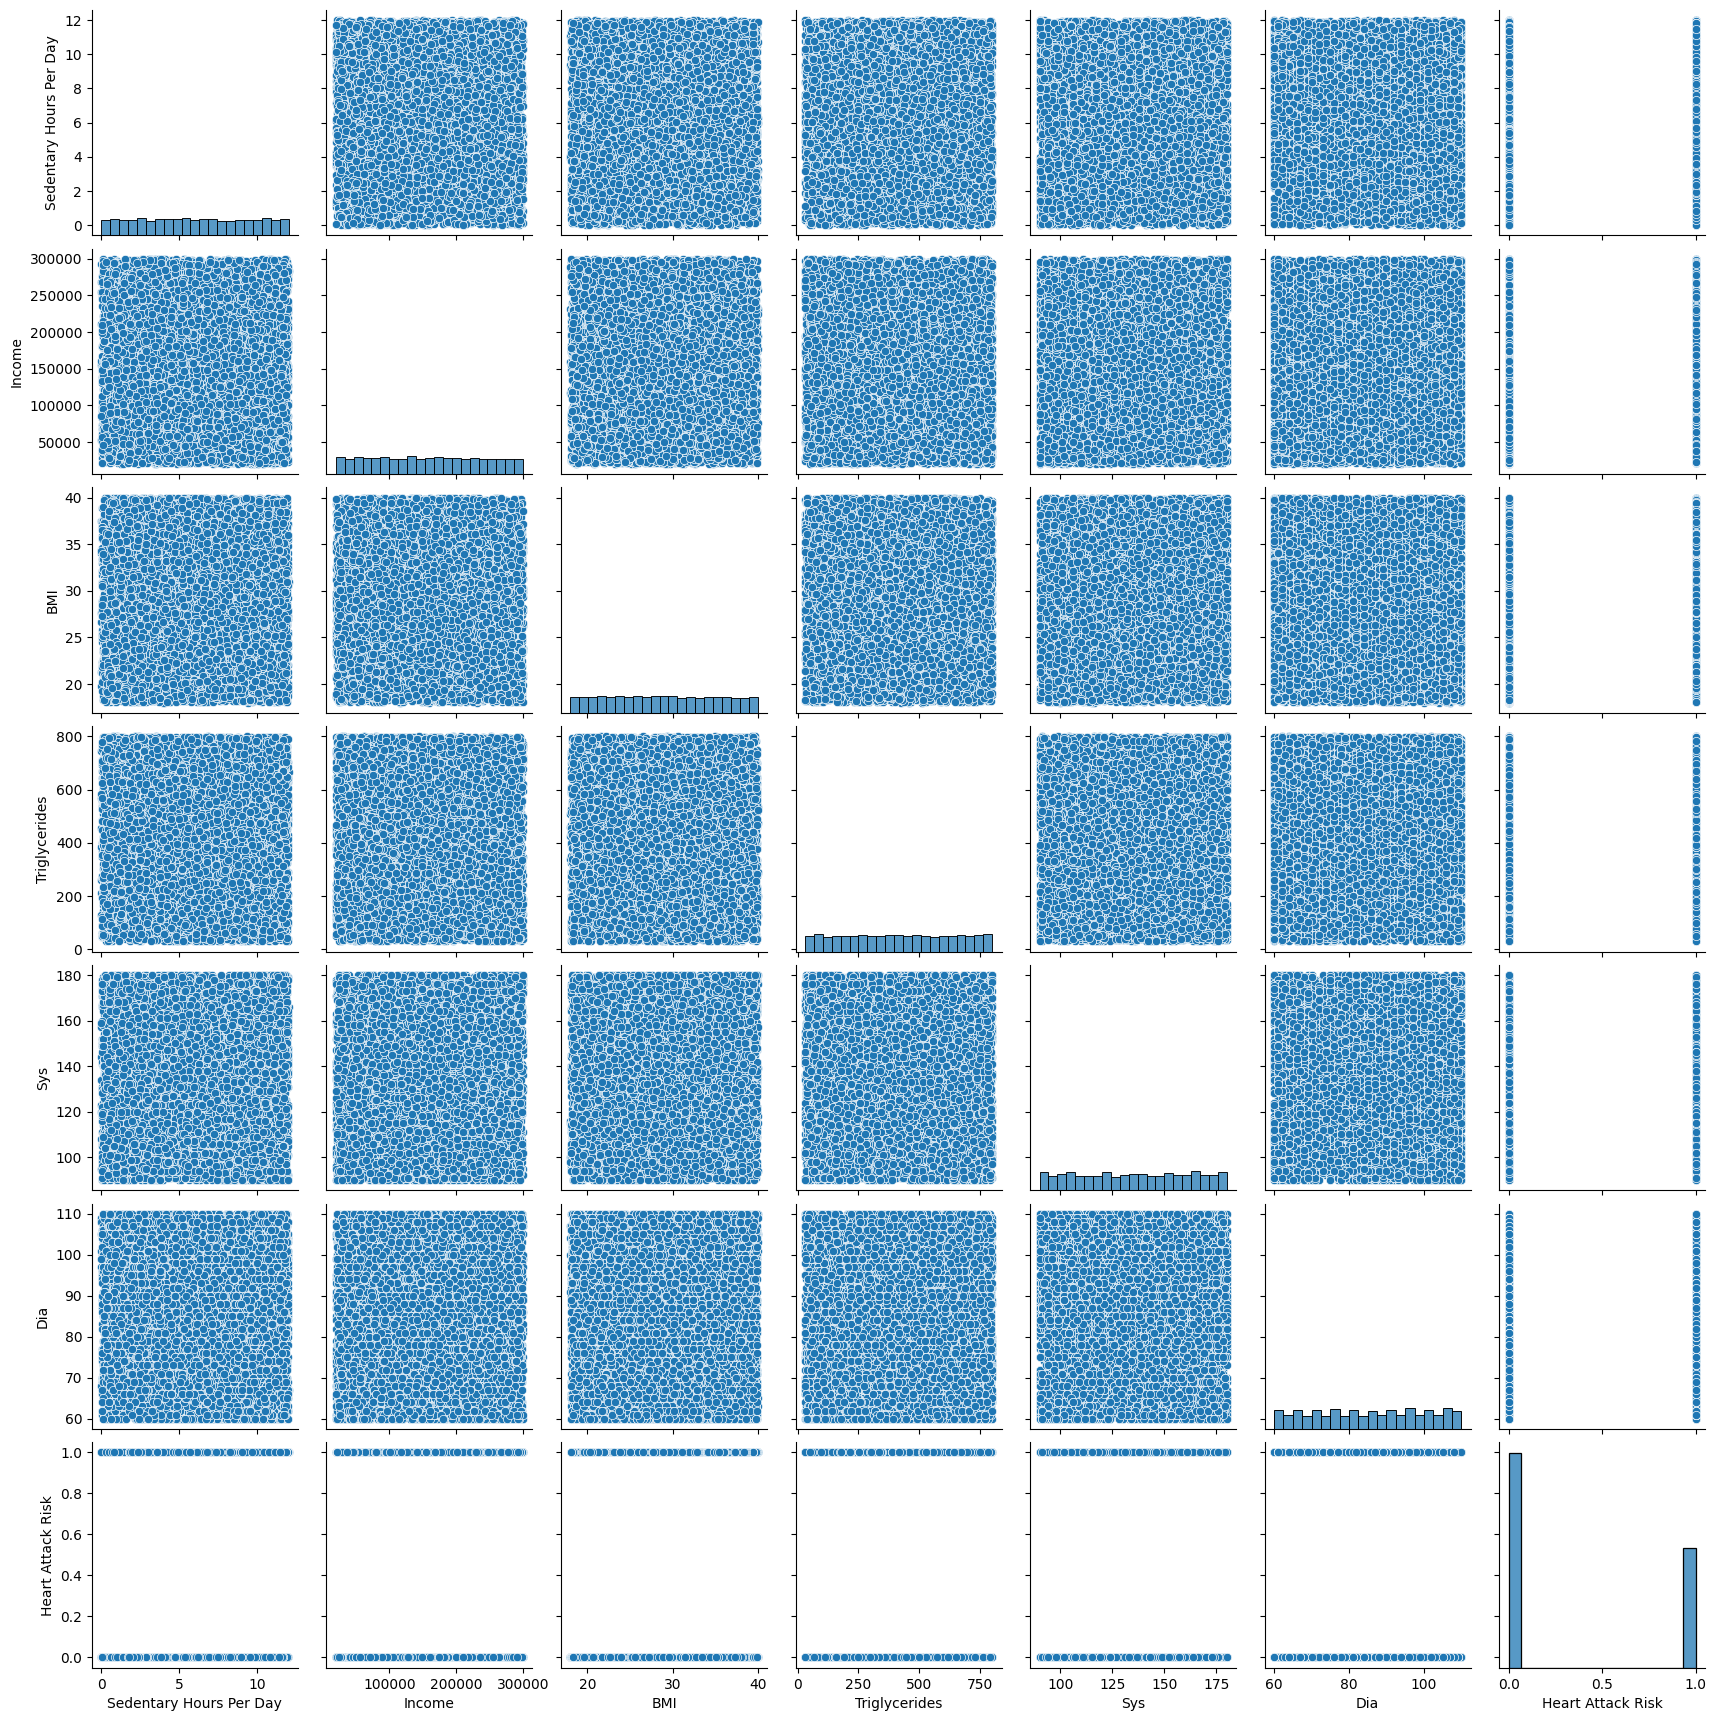

In [30]:
sns.pairplot(df_mod[num_columns[len(num_columns)//2-1::] + ['Heart Attack Risk']])
plt.show()

На попарном сравнении числовых признаков близкое к равномерному распределению

<Axes: >

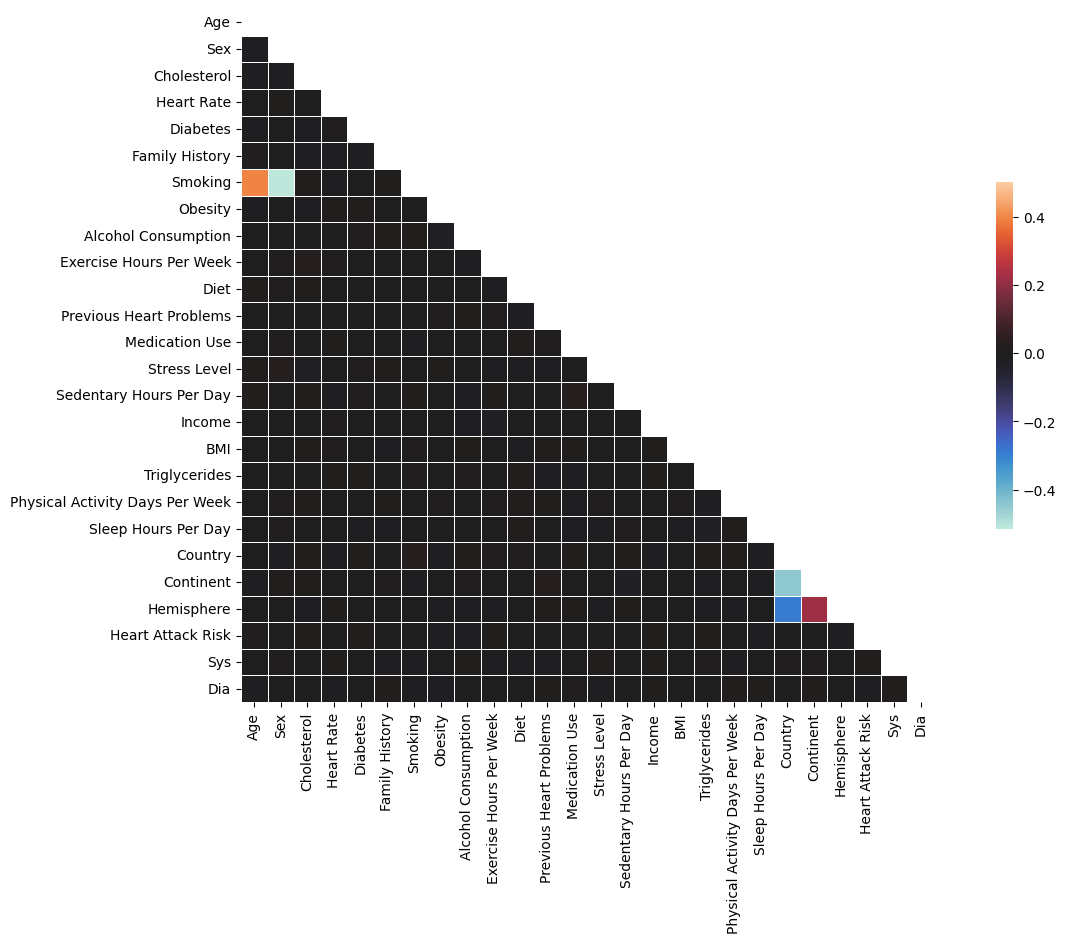

In [31]:
corr = df_mod.corr()

mask= np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(16, 9))


sns.heatmap(corr, mask=mask, vmax=0.5, center=0, square=True, linewidths=.5, cbar_kws={'shrink':0.5})

Из карты корреляция видна положительные корреляции курения и возраста также из-за странных данных в курении. Из-за прямой зависимости географических признаков Country, Continent, Hemisphere есть корреляции, нужно будет пробовать обучение, на наиболее содержательном признаке - стране Country

#### Мини вывод изучения данных

Распределение относительно целевой метки почти везде равномерное.
Из аномалий только странный сбор данных для категории курящих. Надо пробовать исключать эту метку для обучения.
Линейные корреляции видны для географических данных, для линейных методов надо оставить только один, попробовать разные.

### 4. Предобработка

#### Масштабирование

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
# s_scaler = StandardScaler().fit(df_mod)
# mm_scaler = MinMaxScaler().fit(df_mod)

# df_standard_scaled = s_scaler.transform(df_mod)
# df_minmax_scaled = mm_scaler.transform(df_mod)


In [34]:
# Есть странный smoking и коррелирующие географические данные
# Выделим 4 набора
features = [*df_mod.columns.values]

no_smoking_only_country_set = [x for x in features if x!='Smoking' and x!='Continent' and x!='Hemisphere']
no_smoking_only_continent_set = [x for x in features if x!='Smoking' and x!='Country' and x!='Hemisphere']
smoking_only_country_set = [x for x in features if x!='Continent' and x!='Hemisphere']
smoking_country_and_continent_set = [x for x in features if x!='Hemisphere']
train_set = {'no_smoking_only_country_set': no_smoking_only_country_set,
               'no_smoking_only_continent_set': no_smoking_only_continent_set,
               'smoking_only_country_set': smoking_only_country_set,
               'smoking_country_and_continent_set': smoking_country_and_continent_set,
               }

### Алгоритмы, стратификация, нормализация

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.model_selection import StratifiedKFold, KFold

#### KNN

In [36]:
def estimator_(df_list, df, estimator, param_grid, cat_features, scoring='f1'):
    result = {}

    for el in df_list:

        y = df[df_list[el]]['Heart Attack Risk']
        X = df[df_list[el]].drop('Heart Attack Risk', axis=1)
        X_train, x_test, Y_train, y_test = train_test_split(
            X, y, random_state=322)

        # так как у меня есть перекодированные категориальные данные
        # разобью данные для разной отработки
        columns_for_one_hot_encoder = [column for column in X.columns if column in cat_features]
        columns_for_standardscaler = [column for column in X.columns if column not in cat_features]

        # создадим препроцессор
        preprocessor = ColumnTransformer(
            transformers = [
                ('num', StandardScaler(), columns_for_standardscaler),
                ('cat', OneHotEncoder(drop='first'), columns_for_one_hot_encoder)
            ])
        # создадим пайплайн
        pipeline  = make_pipeline(preprocessor, estimator)

        grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring)
        grid_search.fit(X_train, Y_train)

        result[f'{estimator}_{el}'] = grid_search
    return result

In [37]:
knn_grid = {
        'kneighborsclassifier__n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int'),
        'kneighborsclassifier__metric': ['minkowski', 'euclidean'],
    }

svm_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    }

logreg_grid = {
    'logisticregression__penalty': ['l2', 'l1', 'elacticnet'],
    'logisticregression__C': [0.0001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__l1_ratio': [0.1, 0.5, 0.9]
    }

In [38]:
result_for_different_sets_knn = estimator_(train_set, df_mod, KNeighborsClassifier(), knn_grid, categorical_columns)

In [39]:
result_for_different_sets_svm = estimator_(train_set, df_mod, SVC(), svm_grid, categorical_columns)

In [40]:
result_for_different_sets_logreg = estimator_(train_set, df_mod, LogisticRegression(), logreg_grid, categorical_columns)

In [41]:
def plot_grid_results(grid_search, param_name):
    res = pd.DataFrame(grid_search.cv_results_)
    param_values = res[f'param_{param_name}']

res1 = result_for_different_sets_knn['KNeighborsClassifier()_no_smoking_only_country_set']
df_res1 = pd.DataFrame(res1.cv_results_)


In [42]:
knn_result = {}
for el in train_set:

    # to do сделать one hot для категориальных данных в числах которых нет связи

    y = df_mod[train_set[el]]['Heart Attack Risk']
    X = df_mod[train_set[el]].drop('Heart Attack Risk', axis=1)
    X_train, x_test, Y_train, y_test = train_test_split(
        X, y, random_state=322)

    knn_grid = {
        'kneighborsclassifier__n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int'),
        'kneighborsclassifier__metric': ['minkowski', 'euclidean'],
    }

    # Зададим метрики
    scoring = ['accuracy', 'f1', 'roc_auc']

    # пайплайн из стандартизации и алгоритма
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

    clf = GridSearchCV(pipe, param_grid=knn_grid, scoring=scoring[1])
    clf.fit(X_train, Y_train)
    knn_result[el] = clf